This note book is dedicated to evaluating agents

In [1]:
!pip install -e disneyenv

Obtaining file:///C:/Users/82751/OneDrive/Desktop/NYU/Reinforcement%20Learning/DS-GA-3001-007-Final-Project/disneyenv
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: disneyenv
    Found existing installation: disneyenv 0.0.1
    Uninstalling disneyenv-0.0.1:
      Successfully uninstalled disneyenv-0.0.1
  Running setup.py develop for disneyenv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym
import disneyenv
from stable_baselines3.common.callbacks import ProgressBarCallback,StopTrainingOnMaxEpisodes

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_performance(arr_reward,arr_travel,agent_name):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(5)
    fig.set_figwidth(10)
    fig.suptitle("Performance for "+agent_name)
    ax1.set_title("Reward")
    ax1.plot(np.arange(len(arr_reward)),arr_reward)
    ax1.axhline(y = np.mean(arr_reward),ls = "dashed",color = "red")
    ax1.set_xlabel("Days")
    ax1.set_ylabel("Reward")
    ax1.set_ylim([100,500])

    ax2.set_title("Total travel time")
    ax2.plot(np.arange(len(arr_travel)),arr_travel,c = "orange")
    ax2.axhline(y = np.mean(arr_travel),ls = "dashed",color = "red")
    ax2.set_xlabel("Days")
    ax2.set_ylim([100,500])
    ax2.set_ylabel("Travel Time")
    plt.show()



In [ ]:
pd.read_csv()

### Deterministic

In [ ]:
# A deterministic agent
env = gym.make("disneyenv/Disney-v0",train = False)
reward_arr = env.ridesinfo.popularity.apply(lambda x:  5 if type(x)!=str else env.reward_dict[x]).to_numpy()

def get_action(obs,reward_arr=reward_arr):
    indicies = np.where((obs["operationStatus"]  + ~obs["pastActions"]) == 2)[0]
    if len(indicies) == 0:
        return env.action_space.n-1
    
    wait_arr = obs["waitTime"][indicies]
    reward_arr = reward_arr[indicies]
    tmp = np.argmax([raeward/wait if wait != 0 else reward for wait,reward in zip(wait_arr,reward_arr)])

    action = indicies[tmp]
    return action

obs = env.reset()
episode_return = 0
episode_travel = 0
return_arr = []
travel_arr= []

while True:
    current_land = env.current_land
    action = get_action(obs)
    obs, reward, done, info = env.step(action)
    episode_return += reward
    next_land = env.current_land
    travel_time = env.adjacency_matrix[current_land][next_land]
    episode_travel += travel_time
    #print("at",env.current_time," the agent travels for "+str(travel_time)+" to go to ride ",env.current_location,"in current land",env.current_land,"and get a reward of",reward)
    next_land = current_land


    if (done):
        return_arr += [episode_return]
        travel_arr +=[episode_travel]
        obs = env.reset()
        episode_return = 0
        episode_travel = 0
        current_land = env.current_land

    if len(return_arr) == 15:
        break

visualize_performance(return_arr,travel_arr,"Deterministic Agent")

### Random

In [ ]:
# A random agent
obs = env.reset()

episode_return = 0
episode_travel = 0
return_arr = []
travel_arr= []

while True:
    current_land = env.current_land
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    episode_return += reward
    next_land = env.current_land
    travel_time = env.adjacency_matrix[current_land][next_land]
    episode_travel += travel_time
    #print("at",env.current_time," the agent travels for "+str(travel_time)+" to go to ride ",env.current_location,"in current land",env.current_land,"and get a reward of",reward)
    next_land - current_land


    if (done):
        return_arr += [episode_return]
        travel_arr +=[episode_travel]
        obs = env.reset()
        episode_return = 0
        episode_travel = 0
        current_land = env.current_land

    if len(return_arr) == 15:
        break

visualize_performance(return_arr,travel_arr,"Random Agent")

### PPO

In [17]:
from stable_baselines3 import PPO 
agent = PPO.load("eval_results_ppo/best_model")
env = gym.make("disneyenv/Disney-v0",train = False)


obs = env.reset()
episode_return = 0
episode_travel = 0
return_arr = []
travel_arr= []

while True:
    current_land = env.current_land
    action,__state = agent.predict(obs)
    obs, reward, done, info = env.step(action)
    episode_return += reward
    next_land = env.current_land
    travel_time = env.adjacency_matrix[current_land][next_land]
    episode_travel += travel_time
    #print("at",env.current_time," the agent travels for "+str(travel_time)+" to go to ride ",env.current_location,"in land",env.current_land,"and get a reward of",reward)
    next_land = current_land


    if (done):
        return_arr += [episode_return]
        travel_arr +=[episode_travel]
        obs = env.reset()
        episode_return = 0
        episode_travel = 0
        current_land = env.current_land

    if len(return_arr) == 15:
        break

visualize_performance(return_arr,travel_arr,"PPO Agent")

NameError: name 'visualize_performance' is not defined

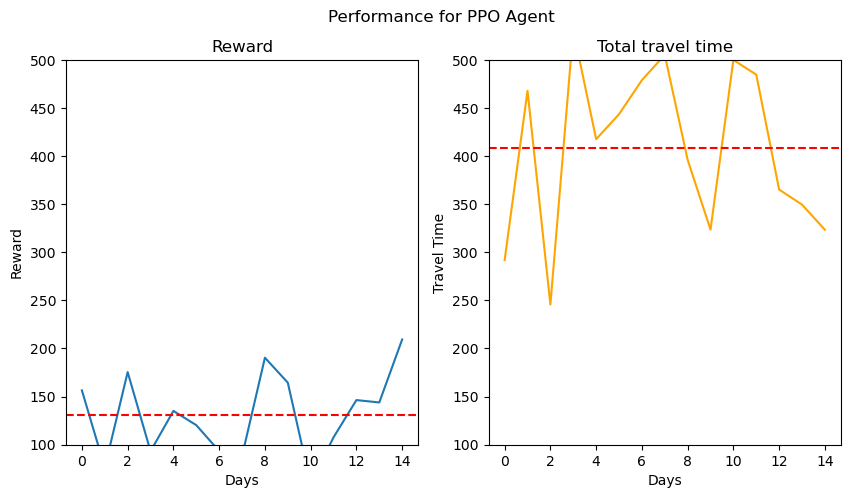

In [19]:
visualize_performance(return_arr,travel_arr,"PPO Agent")

### DQN

### A2C